In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
path = '/home/andres/Escritorio/OrgaDeDatos'
df= pd.read_csv(path + '/train.csv')

#Fuente: https://es.investing.com/currencies/usd-mxn-historical-data
path1 = '/home/andres/Escritorio/OrgaDeDatos'
dolar= pd.read_csv(path1 + '/Datos históricos USD_MXN.csv')
dolar.columns = ["fecha", "last", "opening", "max", "min", "std"]
dolar.drop(["std", "opening", "opening", "max", "min"], axis=1 ,inplace=True)


dolar['date'] = pd.to_datetime(dolar['fecha'], format="%b %Y")
dolar.drop(["fecha"], axis=1, inplace=True)


dolar.columns= ['price', "date"]

dolar['price'] = dolar['price'].replace(',', '.', regex=True).astype(float)
dolar["year"] = dolar.date.dt.year
dolar['month'] = dolar.date.dt.month
dolar.drop(["date"], axis=1, inplace=True)


df['fecha'] = pd.to_datetime(df['fecha'])
df['year'] = df['fecha'].dt.year
df['month']= df['fecha'].dt.month

sns.set_context("paper", font_scale=1.9) 
newDf= pd.merge(df, dolar, on=['year', 'month'], how='left')
newDf["dollar_price"] = newDf.apply(lambda row: row["precio"]/row["price"], axis=1)
df=newDf
display(df)
#df.descripcion.describe()


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,year,month,price,dollar_price
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2273000.0,2015,8,16.7522,135683.671398
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,0.0,0.0,0.0,1.0,1.0,3600000.0,2013,6,12.9460,278078.170864
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1200000.0,2015,10,16.5000,72727.272727
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,650000.0,2012,3,12.8070,50753.494183
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1150000.0,2016,6,18.2800,62910.284464
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1100000.0,2014,3,13.0578,84240.836894
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1150000.0,2016,2,18.1350,63413.289220
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,4200000.0,2016,10,18.8640,222646.310433
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,0.0,0.0,0.0,1.0,1.0,310000.0,2014,1,13.3562,23210.194516
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,6200000.0,2016,12,20.7275,299119.527198


,index,ciudad,provincia,precio
0,547,Quitupan,Jalisco,1.250000e+07
1,283,Gral. Treviño,Nuevo León,1.200000e+07
2,96,Batopilas,Chihuahua,1.200000e+07
3,899,ácatlán de Juárez,Jalisco,1.065140e+07
4,194,Contepec,Michoacán,9.200000e+06
5,728,Tepalcatepec,Michoacán,9.000000e+06
6,73,Atengo,Jalisco,8.635200e+06
7,816,Ucú,Yucatán,8.500000e+06
8,513,Peribán,Michoacán,8.000000e+06
9,813,Tzucacab,Yucatán,7.800000e+06


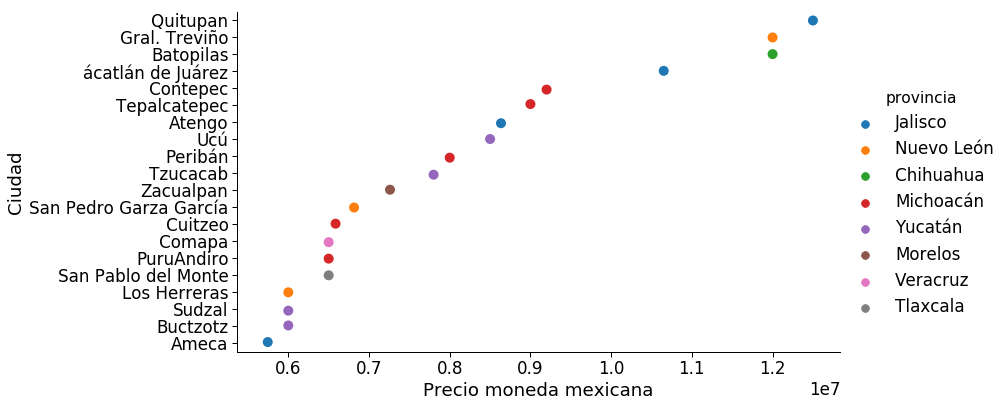

In [3]:
d0=df.groupby(['ciudad','provincia']).agg({'precio':'mean'})
sns.set_context("paper", font_scale=1.9)
d0.reset_index(inplace=True)
d0.sort_values(by=['precio'],ascending = [False],inplace = True)
d0.reset_index(inplace=True)
dh = d0.iloc[0:20:]
display(dh)
g0=sns.catplot(y="ciudad",x='precio',kind='strip',data=dh,orient='h',hue='provincia',height=6,aspect=2.1,sizes=(100,10))
g0.set_axis_labels("Precio moneda mexicana","Ciudad")


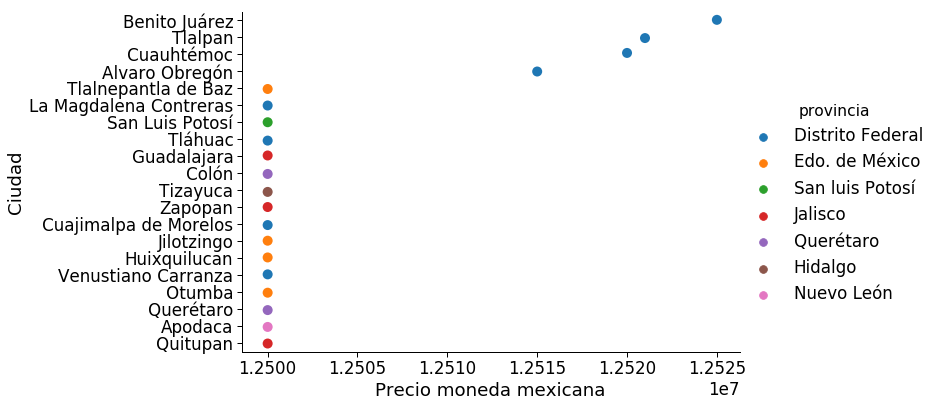

In [4]:
d0=df.groupby(['ciudad','provincia']).agg({'precio':'max'})
sns.set_context("paper", font_scale=1.9)
d0.reset_index(inplace=True)
d0.sort_values(by=['precio'],ascending = [False],inplace = True)
d0.reset_index(inplace=True)
dh = d0.iloc[0:20:]
g0=sns.catplot(y="ciudad",x='precio',kind='strip',data=dh,orient='h',hue='provincia',height=6,aspect=1.9,sizes=(100,10))
g0.set_axis_labels("Precio moneda mexicana","Ciudad")


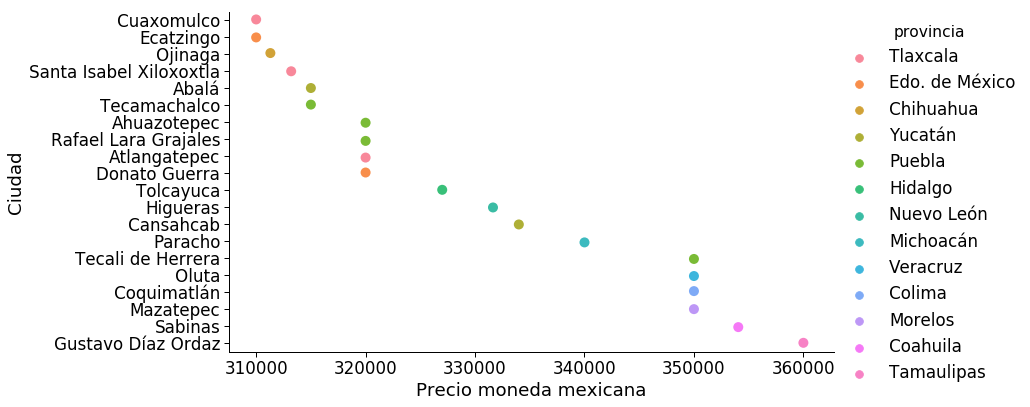

In [5]:
d0=df.groupby(['ciudad','provincia']).agg({'precio':'mean'})
sns.set_context("paper", font_scale=1.9)
d0.reset_index(inplace=True)
d0.sort_values(by=['precio'],ascending = [True],inplace = True)
d0.reset_index(inplace=True)
dh = d0.iloc[0:20:]
g0=sns.catplot(y="ciudad",x='precio',kind='strip',data=dh,orient='h',hue='provincia',height=6,aspect=2.1,sizes=(100,10))
g0.set_axis_labels("Precio moneda mexicana","Ciudad")

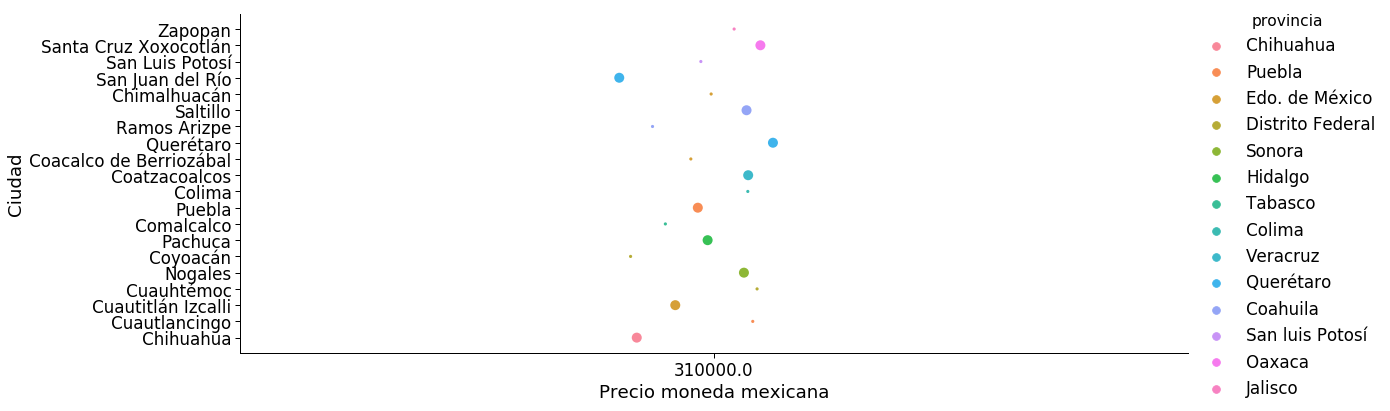

In [6]:
d0=df.groupby(['ciudad','provincia']).agg({'precio':'min'})
sns.set_context("paper", font_scale=1.9)
d0.reset_index(inplace=True)
d0.sort_values(by=['precio'],ascending = [True],inplace = True)
d0.reset_index(inplace=True)
dh = d0.iloc[0:20:]
g0=sns.catplot(y="ciudad",x='precio',kind='strip',data=dh,orient='v',hue='provincia',height=6,aspect=2.9,sizes=(100,10))
g0.set_axis_labels("Precio moneda mexicana","Ciudad")


In [7]:
d0 = df.groupby(['descripcion','provincia']).agg({'precio':'count'})
d0.sort_values(by=['precio'],ascending = [False],inplace = True)
d0['Cantidad de veces descripcion repetida'] = d0['precio']
d0.drop(['precio'],axis=1,inplace=True)
d0.head(3304)


,,Cantidad de veces descripcion repetida
descripcion,provincia,
"casa, sala comedor, buenas condiciones.",Edo. de México,72
"casa, sala comedor, patio de servicio, buenas condiciones.",Edo. de México,63
-- caia --,Edo. de México,40
"<p>puedes pagarla de contado, infonavit, isssteleon o&nbsp; bancario. somos asesores autorizados por el banco, para mayores informes consulta con nuestros asesores. te apoyaremos en el tramite de la oferta al banco.</p>\r\n<p>&nbsp;</p>",Nuevo León,40
<br>,Distrito Federal,33
puedes recibir mayor información por whatsapp \n\ntodos nuestros inmuebles se entregan 100% remodelados \nno te preocupes por tus horarios de trabajo \nte programamos una cita fines de semana \npara que conozcas nuestros inmuebles \n.............................llama ahora y agenda tu cita....................... \n:::::::::::::::::::::::::aceptamos todos los créditos: \n..............(((casa al corriente de todos los pagos)))..........,Puebla,33
<br>,Jalisco,32
aproveche excelente oportunidad de remate. departamento con muy buena ubicación. cerca de importantes vías de comunicación y zonas comerciales. costo total de pesos. pago inicial de y al momento de firmar la cesion de derechos (en un plazo no mayor a 10 meses o antes). no aceptamos ningún tipo de credito. para mayor información comunicarse con el lic. escalante a los telefonos / o al correo electrónico somos una empresa seria con mas de 20 años de experiencia en el ramo.,Distrito Federal,30
"empresa dedicada a los ante notario y registro público tiene grandes oportunidades para ti desde un 50-70% debajo de su avalúo, cesiones de derechos con garantia hipotecaria en buenas condiciones en venta únicamente de contado no creditos. si no sabes que es un remate hipotecario no te preocupes nosotros te explicamos. inversión segura, pago de contado. \n\n* las imágenes y descripción aquí presentadas pueden no representar con exactitud la realidad por tener diferencias en relación con la numeración, ubicación y superficies. (r) no es inmobiliaria sino media derechos crediticios litigiosos y/o adjudicatarios.",Edo. de México,28


In [12]:
d0 = df.groupby(['provincia','descripcion']).agg({'tipodepropiedad':'count','precio':'mean'})
d0.sort_values(by=['tipodepropiedad'],ascending = [False],inplace = True)
d0['Cantidad de veces descripcion repetida'] = d0['tipodepropiedad']
d0.drop(['tipodepropiedad'],axis=1,inplace=True)
#d1=d0.iloc[:20:]
d0.sort_values(by=['precio'],ascending = [False],inplace = True)
display(d0)

precio  \
provincia             descripcion                                                      
Distrito Federal      excelente oficina en venta en torre world trade...  12525000.0   
                      condominio tipo mexicano moderno de 3 casas ubi...  12521000.0   
                      proyecto de imanol legorreta y carlos duclaud c...  12520000.0   
                      edificio de 5 niveles con 9 departamentos, ofre...  12516000.0   
                      ¡excelente oportunidad de inversión! nosotros t...  12515000.0   
Edo. de México        la casa tiene 450m2 de contruccion y 250m2 de t...  12500000.0   
Distrito Federal      -- rcv4908e-36 --    &nbsp;  \nexclusivo fracci...  12500000.0   
                      excelente terreno con uso de suelo h320, cerca ...  12500000.0   
                      preciosa casa colonial en el exclusivo chimalis...  12500000.0   
                      <p>preciosa residencia en preventa en la zona m...  12500000.0   
                      increíble ph a cinco minutos del periférico sob...  12500000.0   
                      sotano 6 autos, amplio jardin, cuarto de servic...  12500000.0   
                      oportunidad, casa en venta con uso de suelo com...  12500000.0   
Edo. de México        bonita casa estilo clásico,en una de las mejore...  12500000.0   
Distrito Federal      madera, piedra, adobe, cuarterones, talavera, h...  12500000.0   
                      madera, piedra, adobe, cuarterones, talavera, h...  12500000.0   
                      -- rcv7882e-105 --    excelente en la mejor zon...  12500000.0   
                      departamento muy iluminado, con una exelente ub...  12500000.0   
Hidalgo               gran oportunidad para inversionistas. \npropied...  12500000.0   
Edo. de México        <p>la casa tiene 450m2 de contruccion y 250m2 d...  12500000.0   
Distrito Federal      <p>gh de 2 rec. la principal con vestidor y bañ...  12500000.0   
Nuevo León            terreno de 640 m2 \nconstrucción de 150 m2 (a d...  12500000.0   
Distrito Federal      <p>precioso departamento en bosques de las loma...  12500000.0   
                      departamento muy grande y en excelente estado d...  12500000.0   
                      características: casa para actualizar dos recám...  12500000.0   
Nuevo León            pre-venta, se empieza a construir cuando se ten...  12500000.0   
Distrito Federal      <p>remodelada hace 10 a&ntilde;os en exclusiva ...  12500000.0   
                      ven a conocer este precioso penthouse en bosque...  12500000.0   
                      venta:  \n\nprecioso departamento ubicado en cl...  12500000.0   
                      <p>gh de 2 rec. la principal con vestidor y bañ...  12500000.0   
...                                                                              ...   
Puebla                casa económica con opción a ampliarse a 15 min ...    310000.0   
Edo. de México        se vende casa en coacalco de berriozabal \ncasa...    310000.0   
Jalisco               * terreno de 5 x 15 mts, * construccion tradici...    310000.0   
Chiapas               <p>se vende casas solas en terreno de 6x15 nuev...    310000.0   
Baja California Norte vendo casa en juventud  recaramas, baño, sala-c...    310000.0   
Chihuahua             <p>casa de una planta, a desniveles y muy cerca...    310000.0   
                      <p>casa de una recamara, sala, comedor cocina y...    310000.0   
Jalisco               información y citas contáctenos \n\naplica únic...    310000.0   
Querétaro             <p>casa econ&oacute;mica, diferentes ubicacione...    310000.0   
                      <p>casa de un nivel ubicada en las haciendas en...    310000.0   
                      <p>3 rec&aacute;maras, patio de servicio,caj&oa...    310000.0   
Durango               <p>casa en perfectas condiciones y con excelent...    310000.0   
Guerrero              bonito departamento malaquita planta baja, cuen...    310000.0   
Durango               casa  ub

In [11]:
d0 = df.groupby(['titulo']).agg({'tipodepropiedad':'count','precio':'mean'})
d0.sort_values(by=['tipodepropiedad'],ascending = [False],inplace = True)
d0['Cantidad de veces descripcion repetida'] = d0['tipodepropiedad']
d0.drop(['tipodepropiedad'],axis=1,inplace=True)
display(d0)

,precio,Cantidad de veces descripcion repetida
titulo,,
casa en venta,2.563618e+06,468
departamento en venta,3.075262e+06,289
casa en venta en chihuahua,1.723271e+06,268
casa en venta en querétaro,2.012577e+06,238
departamento en venta en benito juárez,2.930017e+06,221
departamento en venta en miguel hidalgo,3.757521e+06,177
casa en venta en mérida,2.205186e+06,167
casa en venta,2.771917e+06,132
casa en venta en torreón,1.500115e+06,119


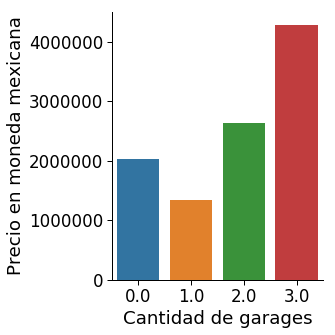

In [24]:
d1 = df.groupby('garages').agg({'precio':'mean'})
d1.sort_values(by=['precio'],ascending = [False],inplace = True)
d1.reset_index(inplace=True)
g1=sns.catplot(y='precio',x='garages',kind='bar',data=d1)
g1.set_axis_labels("Cantidad de garages","Precio en moneda mexicana")

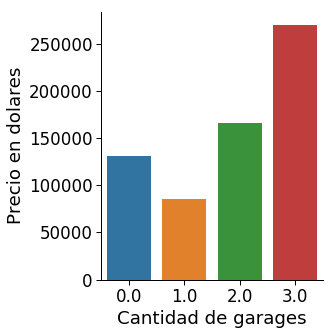

In [26]:
d2 = df.groupby('garages').agg({'dollar_price':'mean'})
d2.sort_values(by=['dollar_price'],ascending = [False],inplace = True)
d2.reset_index(inplace=True)
g2=sns.catplot(y='dollar_price',x='garages',kind='bar',data=d1)
g2.set_axis_labels("Cantidad de garages","Precio en dolares")

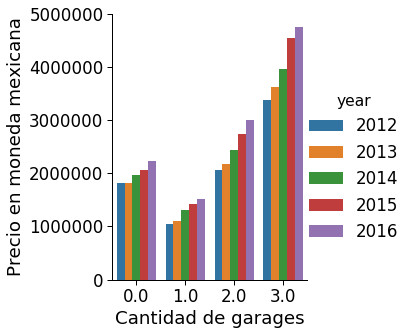

In [27]:
d1 = df.groupby(['garages','year']).agg({'precio':'mean'})
d1.sort_values(by=['precio'],ascending = [False],inplace = True)
d1.reset_index(inplace=True)
g1=sns.catplot(y='precio',x='garages',kind='bar',data=d1,hue='year')
g1.set_axis_labels("Cantidad de garages","Precio en moneda mexicana")

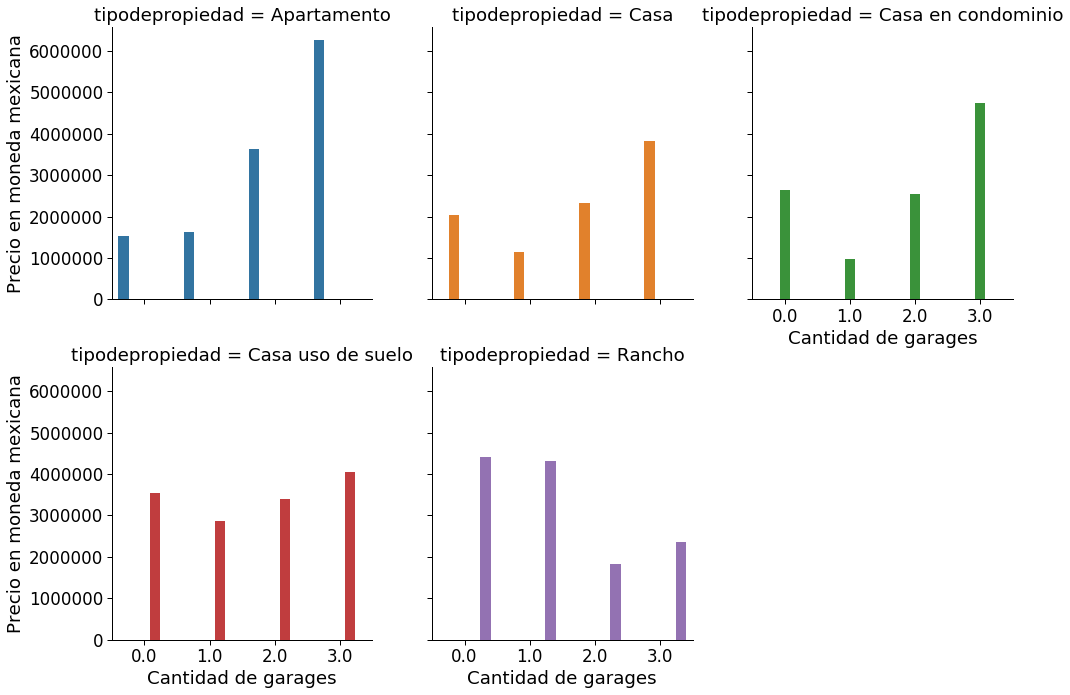

In [52]:
sns.set_context("paper", font_scale=1.9)

d1 = df.groupby(['tipodepropiedad','garages']).agg({'precio':'mean'})
#d1.sort_values(by=['precio'],ascending = [False],inplace = True)
d1.reset_index(inplace=True)
filtro1 = d1['tipodepropiedad'].isin(['Casa','Apartamento','Casa en condominio','Rancho','Casa uso de suelo'])
d2=d1[filtro1]
g1=sns.catplot(y='precio',x='garages',kind='bar',data=d2,hue='tipodepropiedad',col_wrap=3,col='tipodepropiedad')
g1.set_axis_labels("Cantidad de garages","Precio en moneda mexicana")

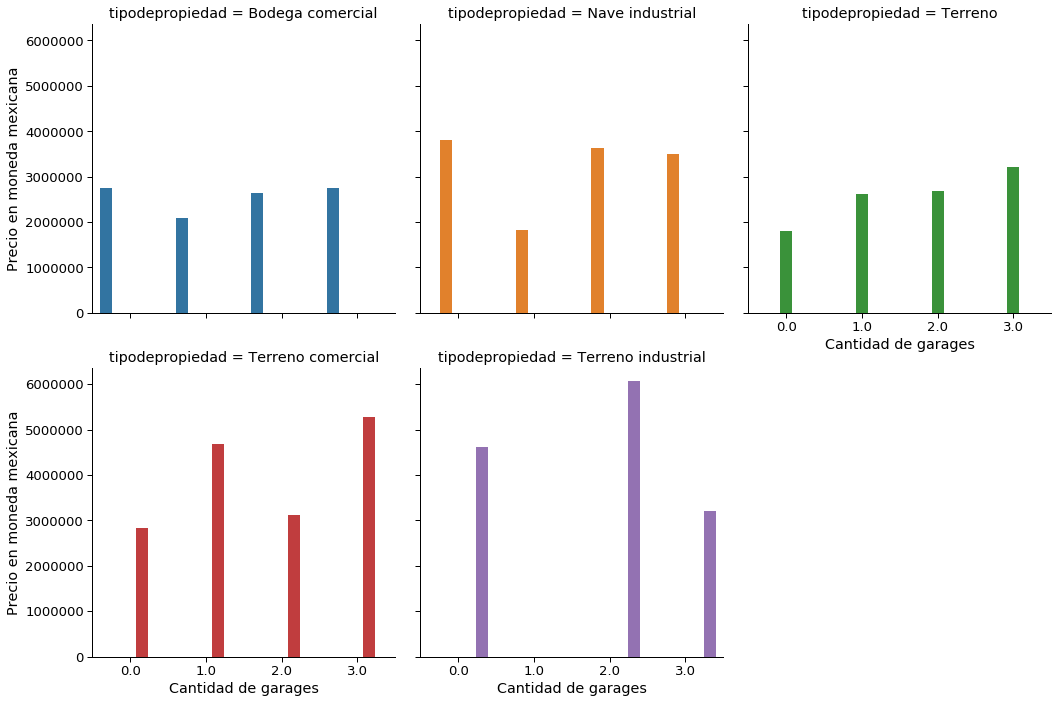

In [55]:
sns.set_context("paper", font_scale=1.5)

d1 = df.groupby(['tipodepropiedad','garages']).agg({'precio':'mean'})
#d1.sort_values(by=['precio'],ascending = [False],inplace = True)
d1.reset_index(inplace=True)
filtro1 = d1['tipodepropiedad'].isin(['Terreno industrial','Nave industrial','Terreno',
                                      'Terreno comercial','Bodega comercial'])
d2=d1[filtro1]
g1=sns.catplot(y='precio',x='garages',kind='bar',data=d2,hue='tipodepropiedad',col_wrap=3,col='tipodepropiedad')
g1.set_axis_labels("Cantidad de garages","Precio en moneda mexicana")